# Assignment: Classification

Classification refers to categorizing the given data into classes. For example,
- Given an image of hand-written character, identifying the character (multi-class classification)
- Given an image, annotating it with all the objects present in the image (multi-label classification)
- Classifying an email as spam or non-spam (binary classification)
- Classifying a tumor as benign or malignant and so on

In this assignment, we will be building a classifier to classify emails as spam or non-spam. We will be using the Kaggle dataset [Spam or Not Spam Dataset](https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset?resource=download) for this task. 

**Note**: You cannot load any libraries other than the mentioned ones.




### Data pre-processing
The first step in every machine learning algorithm is to process the raw data in some meaningful representations. We will be using the [Bag-of-Words](https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971) representation to process the text. It comprises of following steps:

- Process emails line-by-line to extract all the words.
- Replace extracted words by their stem (root) word. This is known as stemming and lematization.
- Remove stop words like and, or, is, am, and so on.
- Assign a unique index to each word. This forms the vocabulary.
- Represent each email as a binary vector of length equal to the size of the vocabulary such that the $i^{th}$ element of the vector is 1 iff the $i^th$ word is present in the email.

Here we provide you with the function signature along with the expected functionality. You are expected to complete them accordingly. 

In [10]:
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
# takes an email as an argument
# read email line-by-line and extract all the words
# return list of extracted words

vocab = []

def read_email(email):
    words = email.strip().split()
    return words
  
# takes a list of words as an argument
# replace each word by their stem word
# return list of stem words
def stemming(words):
    stemmer = PorterStemmer()
    stem_words = []
    for word in words:
        stem_words.append(stemmer.stem(word))
    
    return stem_words

# takes a list of stem-words as an argument
# remove stop words
# return list of stem words after removing stop words
def remove_stop_words(stem_words):
    stem_no_stop_words = []
    stop_words = set(stopwords.words('english'))
    for word in stem_words:
        if word not in stop_words:
            stem_no_stop_words.append(word)
    return stem_no_stop_words

# takes a list of stem-words as an argument
# add new words to the vocabulary and assign a unique index to them
# returns new vocabulary
def build_vocabulary(stem_words):
    for word in stem_words:
        if word not in vocab:
            vocab.append(word)
    return

# takes a list of stem-words and vocabulary as an argument
# returns bow representation
def get_bow(stem_words):
    email_bow = []
    bow = {}
    for word in vocab:
      bow[word] = 0
    for word in stem_words:
      bow[word] += 1
    for word in vocab:
      email_bow.append(bow[word])
    return email_bow

def text_to_bow(string_data):
    list1 = []
    list2 = []
    for email in string_data:
        list1.append(get_bow(remove_stop_words(stemming(read_email(email)))))
        list2.append(int(string_data[email]))
    return [np.array(list1),np.array(list2)]
# read the entire dataset
# convert emails to bow and maintain their labels
# call function text_to_bow()
def read_data():
    emails = []
    with open('spam_or_not_spam.csv',"r",encoding='utf-8') as email:
        emails = email.readlines()
    flag = 0
    string_data = {}    
    for line in emails:
        if not flag:
            flag = 1
        else:
            email,label = line.rsplit(",", 1)
            build_vocabulary(remove_stop_words(stemming(read_email(email))))
            string_data[email] = label
    data = text_to_bow(string_data)
    return data
data = read_data()

[nltk_data] Downloading package stopwords to C:\Users\Samarpreet
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Visualization
Let's understand the data distribution
- Visualize the frequency of word-occurence in all the emails(spam + non-spam)
- Visualize the freuency of word-occurence for spam and non-spam emails separately

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


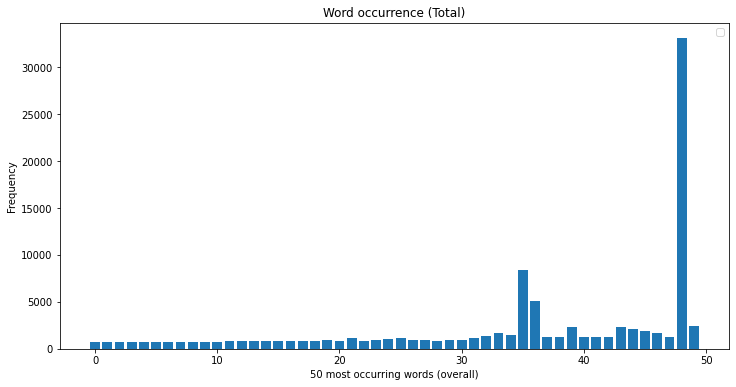

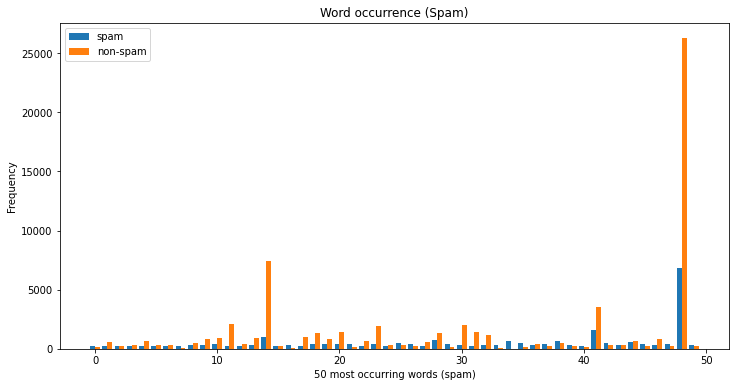

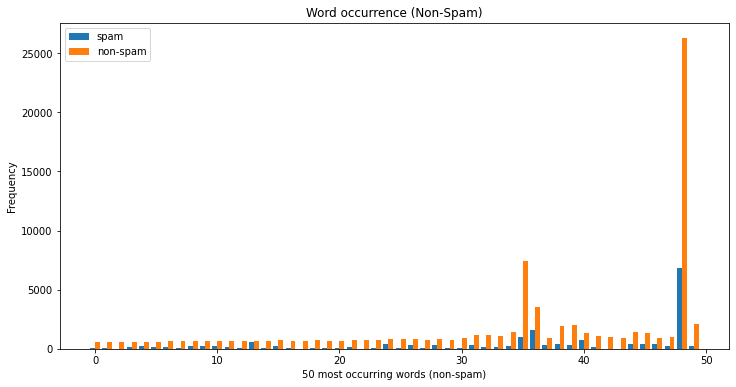

In [15]:
import matplotlib.pyplot as plt

# visuallze data distribution
def data_vis(data):
    spam_list = np.zeros(len(vocab))
    non_spam_list = np.zeros(len(vocab))
    for i in range(len(data[1])):
          if data[1][i] == 1:
            for j in range(len(vocab)):
                spam_list[j] = spam_list[j] + data[0][i][j]
          if data[1][i] == 0:
            for j in range(len(vocab)):
                non_spam_list[j] = non_spam_list[j] + data[0][i][j]
    total_list = np.add(spam_list,non_spam_list)
    
    ind = np.argpartition(total_list, -50)[-50:]
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(50),total_list[ind])
    plt.xlabel("50 most occurring words (overall)")
    plt.ylabel("Frequency")
    plt.title("Word occurrence (Total)")
    plt.legend()
    plt.show()
    
    ind = np.argpartition(spam_list, -50)[-50:]
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(50)-0.2,spam_list[ind],0.4,label='spam')
    plt.bar(np.arange(50)+0.2,non_spam_list[ind],0.4,label='non-spam')
    plt.xlabel("50 most occurring words (spam)")
    plt.ylabel("Frequency")
    plt.title("Word occurrence (Spam)")
    plt.legend()
    plt.show()    
  
    ind = np.argpartition(non_spam_list, -50)[-50:]
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(50)-0.2,spam_list[ind],0.4,label='spam')
    plt.bar(np.arange(50)+0.2,non_spam_list[ind],0.4,label='non-spam')
    plt.xlabel("50 most occurring words (non-spam)")
    plt.ylabel("Frequency")
    plt.title("Word occurrence (Non-Spam)")
    plt.legend()
    plt.show() 

data_vis(data)

### Learn a Classifier
Split the dataset randomly in the ratio 80:20 as the training and test dataset. Use only training dataset to learn the classifier. No test data should be used during training. Test data will only be used during evaluation.

Now let us try to use ML algorithms to classify emails as spam or non-spam. You are supposed to implement [SVM](https://scikit-learn.org/stable/modules/svm.html) and [K-Nearest Neighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm available in scikit-learn using the same training dataset for both.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import random
# split dataset
def split(data):
  n = range(len(data[0]))
  n1 = int(len(n)*8/10)
  res = random.sample(list(n),n1)
  train_data = []
  test_data = []
  for i in n:
    if i in res:
      train_data.append([data[0][i],data[1][i]])
    else:
      test_data.append([data[0][i],data[1][i]])
  return train_data, test_data

# learn a SVM model
# use the model to make prediction
# return the model predictions on train and test dataset
def svm_classifier(train_data,test_data, X_train, Y_train, X_test):
  
  model = svm.SVC()
  model.fit(X_train,Y_train)
  predict_labels = model.predict(X_train),model.predict(X_test)
  return predict_labels

# implement k-NN algorithm
# use the model to make prediction
# return the model predictions on train and test dataset
def knn_classifier(train_data,test_data, X_train, Y_train, X_test):

  model = KNeighborsClassifier(n_neighbors=5)
  model.fit(X_train,Y_train)
  predict_labels = model.predict(X_train),model.predict(X_test)
  return predict_labels

train_data, test_data = split(data)
X_train = []
Y_train = []
X_test = []
Y_test = []
for x in train_data:
  X_train.append(x[0])
  Y_train.append(x[1])
for x in test_data:
  X_test.append(x[0])
  Y_test.append(x[1])
svm_train_predictions, svm_test_predictions = svm_classifier(train_data, test_data, X_train, Y_train, X_test)
knn_train_predictions, knn_test_predictions = knn_classifier(train_data, test_data, X_train, Y_train, X_test)

### Model Evaluation
Compare the SVM and k-NN model using metrics
- Accuracy
- [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)


In [18]:
from sklearn import metrics
# compute accuracy 
def compute_accuracy(true_labels, predicted_labels):
  acc = metrics.accuracy_score(true_labels,predicted_labels)
  return acc

# compute AUC score 
def compute_auc(true_labels, predicted_labels):
  auc = metrics.roc_auc_score(true_labels,predicted_labels)
  return auc

# write code to print train and test accuracy and AUC score of SVM and k-NN classifier
print("Accuracy score for train data (SVM): ",compute_accuracy(Y_train,svm_train_predictions))
print("Accuracy score for test data (SVM): ",compute_accuracy(Y_test,svm_test_predictions))
print("Accuracy score for train data (KNN): ",compute_accuracy(Y_train,knn_train_predictions))
print("Accuracy score for test data (KNN): ",compute_accuracy(Y_test,knn_test_predictions))
print('\n')
print("AUC score for train data (SVM): ",compute_auc(Y_train,svm_train_predictions))
print("AUC score for test data (SVM): ",compute_auc(Y_test,svm_test_predictions))
print("AUC score for train data (KNN): ",compute_auc(Y_train,knn_train_predictions))
print("AUC score for test data (KNN): ",compute_auc(Y_test,knn_test_predictions))

Accuracy score for train data (SVM):  0.953437771975631
Accuracy score for test data (SVM):  0.951304347826087
Accuracy score for train data (KNN):  0.9199303742384682
Accuracy score for test data (KNN):  0.8608695652173913


AUC score for train data (SVM):  0.8429401642313731
AUC score for test data (SVM):  0.8444444444444444
AUC score for train data (KNN):  0.8306424344885883
AUC score for test data (KNN):  0.7636884306987399
